DATE                    0
Food Expenditures       0
GDP                     0
S&P 500                 0
Home Price Index        0
Unemployed Rate         0
Real Personal Income    0
Retail Sales            0
CPI                     0
dtype: int64
       Food Expenditures           GDP      S&P 500  Home Price Index  \
count           41.00000     41.000000    41.000000         41.000000   
mean          1019.28439  20159.171463  2700.867805        204.158911   
std            133.69554   2648.926849   895.806103         43.966488   
min            852.90000  16420.390000  1412.160000        144.564333   
25%            917.37000  18193.710000  2018.050000        170.881000   
50%            989.60000  19636.730000  2575.260000        195.969000   
75%           1127.70000  21538.030000  3225.520000        217.263333   
max           1310.57000  26144.960000  4605.380000        303.489667   

       Unemployed Rate  Real Personal Income   Retail Sales         CPI  
count        41.00000

/var/folders/h5/v3qyf40113lctbtb5g8k2k340000gn/T/ipykernel_30195/1711536522.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


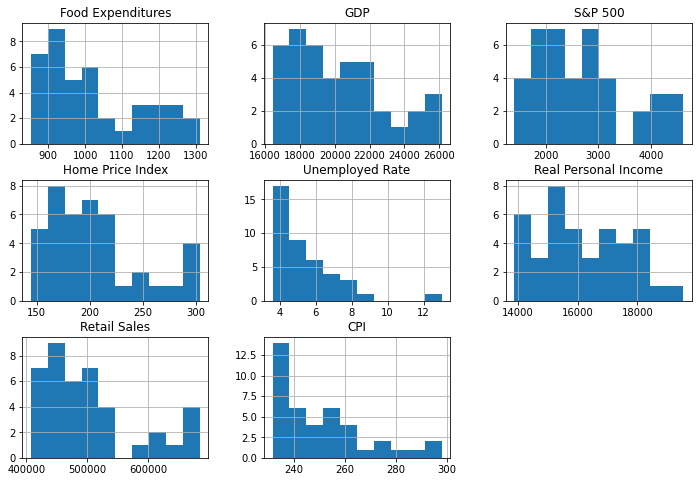

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load data
data= pd.read_csv('Project.csv')

#check for missing values
print(data.isnull().sum())

#impute missing values with mean
data.fillna(data.mean(), inplace=True)

#Descriptive statistics
desc_stats= data.describe()
print(desc_stats)

# Plot histograms for each variable
data.hist(bins=10, figsize=(12,8))
plt.show()

In [2]:
# Check the data types for the variables
print(data.dtypes)

# Convert date into Unix timestamp
data['DATE'] = pd.to_datetime(data['DATE']).astype(int)/10**9

print(data.dtypes)

# Calculate correlation matrix
corr_matrix = data[['Food Expenditures', 'DATE', 'GDP', 'S&P 500', 'Home Price Index', 
                    'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']].corr()

# Print correlation matrix
print(corr_matrix)

DATE                     object
Food Expenditures       float64
GDP                     float64
S&P 500                 float64
Home Price Index        float64
Unemployed Rate         float64
Real Personal Income    float64
Retail Sales            float64
CPI                     float64
dtype: object
DATE                    float64
Food Expenditures       float64
GDP                     float64
S&P 500                 float64
Home Price Index        float64
Unemployed Rate         float64
Real Personal Income    float64
Retail Sales            float64
CPI                     float64
dtype: object
                      Food Expenditures      DATE       GDP   S&P 500  \
Food Expenditures              1.000000  0.959797  0.967718  0.967858   
DATE                           0.959797  1.000000  0.962011  0.950977   
GDP                            0.967718  0.962011  1.000000  0.960462   
S&P 500                        0.967858  0.950977  0.960462  1.000000   
Home Price Index               

In [3]:
# Calculate correlation coefficients with food_expenditure
corr_coeffs = data.corr()['Food Expenditures'].sort_values(ascending=False)
# Print correlation coefficients
print(corr_coeffs)

Food Expenditures       1.000000
Home Price Index        0.984239
CPI                     0.973996
Retail Sales            0.968568
S&P 500                 0.967858
GDP                     0.967718
DATE                    0.959797
Real Personal Income    0.912266
Unemployed Rate        -0.224710
Name: Food Expenditures, dtype: float64


In [15]:
# Define dependent and independent variables 
data = data.fillna(data.mean())
y= data['Food Expenditures']
X= data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Add constant term to independet variables
X= sm.add_constant(X)

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

#print summary of regression result
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Food Expenditures   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     777.0
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.00e-34
Time:                        22:04:09   Log-Likelihood:                -153.62
No. Observations:                  41   AIC:                             323.2
Df Residuals:                      33   BIC:                             336.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -352.4315 

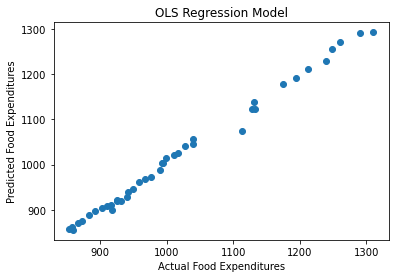

Mean Squared Error: 103.68721809086733


In [6]:
from sklearn.metrics import mean_squared_error
#Get the predicted values of the model
y_pred= model.predict(X)

# Plot the predicted values against the actual values
plt.scatter(y, y_pred)
plt.xlabel('Actual Food Expenditures')
plt.ylabel('Predicted Food Expenditures')
plt.title('OLS Regression Model')
plt.show()

mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split the data into X and y
X = data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF table
print(vif)

              variables           VIF
0                   GDP  12197.642069
1               S&P 500    325.994025
2      Home Price Index   1689.876666
3       Unemployed Rate     57.352612
4  Real Personal Income   1411.197878
5          Retail Sales   2677.502748
6                   CPI   5548.297449


Mean Squared Error: 649.1351701526798
Coefficients: [ 6.00081395e-04  2.24585174e-02  1.85249594e+00  7.13374956e+00
  1.69280268e-02  1.73296970e-04 -4.04596799e-01]


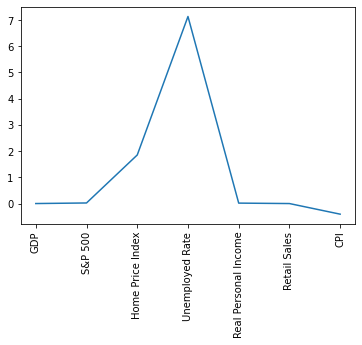

In [8]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# perform ridge regression with cross-validation to tune alpha parameter
alphas = np.logspace(-4, 4, 50)
ridge_cv = RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train, y_train)

# evaluate model performance on test set
y_pred = ridge_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# print coefficients of independent variables
coef = ridge_cv.coef_
print("Coefficients:", coef)

# plot coefficients
import matplotlib.pyplot as plt
plt.plot(range(len(coef)), coef)
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.show()

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

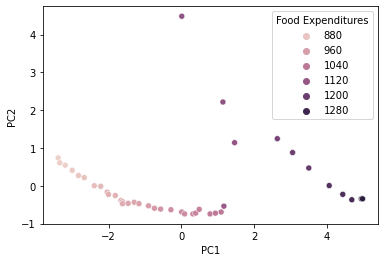

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# create a dataframe with your independent variables
X = data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# create a new dataframe with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# add the dependent variable 'food expenditures' to the new dataframe
principal_df['Food Expenditures'] = data['Food Expenditures']

# plot the principal components against the dependent variable
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Food Expenditures')

In [10]:
#  X is data matrix
X = data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Create a PCA object with n_components = number of features
pca = PCA(n_components=X.shape[1])

# Fit PCA on the data matrix X
pca.fit(X)

# Get the variance ratio of each principal component
var_ratio = pca.explained_variance_ratio_

# Print the variance ratio of each principal component
for i, ratio in enumerate(var_ratio):
    print(f"Variance ratio of PC{i + 1}: {ratio:.4f}")

Variance ratio of PC1: 0.9999
Variance ratio of PC2: 0.0001
Variance ratio of PC3: 0.0000
Variance ratio of PC4: 0.0000
Variance ratio of PC5: 0.0000
Variance ratio of PC6: 0.0000
Variance ratio of PC7: 0.0000


                            OLS Regression Results                            
Dep. Variable:      Food Expenditures   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           8.21e-37
Time:                        22:10:10   Log-Likelihood:                -164.55
No. Observations:                  41   AIC:                             337.1
Df Residuals:                      37   BIC:                             344.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -59.6116     51.369     

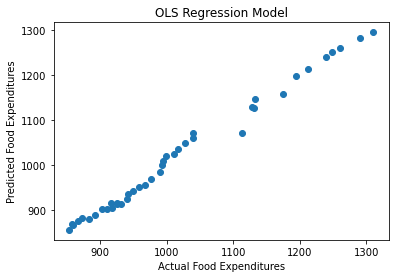

Mean Squared Error: 179.2706294408747


In [16]:
# create a new dataframe with the selected principal component and dependent variable
data = data.fillna(data.mean())
y= data['Food Expenditures']
X= data[['GDP','S&P 500','Unemployed Rate']]

# Add constant term to independet variables
X= sm.add_constant(X)

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

#print summary of regression result
print(model.summary())


#Get the predicted values of the model
y_pred= model.predict(X)

# Plot the predicted values against the actual values
plt.scatter(y, y_pred)
plt.xlabel('Actual Food Expenditures')
plt.ylabel('Predicted Food Expenditures')
plt.title('OLS Regression Model')
plt.show()

mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)

In [17]:
import statsmodels.api as sm

y= data['Food Expenditures']
X= data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the p-values and t-values of the model
p_values = model.pvalues
t_values = model.tvalues

print("P values:", p_values)
print("t values:", t_values)

P values: GDP                     0.337249
S&P 500                 0.127583
Home Price Index        0.000294
Unemployed Rate         0.002054
Real Personal Income    0.007614
Retail Sales            0.874494
CPI                     0.094716
dtype: float64
t values: GDP                     0.973359
S&P 500                 1.561857
Home Price Index        4.034053
Unemployed Rate         3.338065
Real Personal Income    2.837419
Retail Sales           -0.159148
CPI                     1.718959
dtype: float64
